# Cost of a label
In this notebook one can find some simple examples of how the cost of a label is calculated. The cost is determined after the decission is made to buy or not buy a certain label. 

In [42]:
import pandas as pd
import numpy as np
import olac.data_generators as dg
import matplotlib.pyplot as plt
import olac.cost_of_label as cst
%matplotlib inline

The data can come in 2 different ways. one is the streaming way which is used for online learning. The other one is that is comes in batches which is used for the batch training.

#### Batch like data

In [43]:
cost=[]
for i in range(0,500):
    data = dg.cluster_generator()
    decision = np.random.binomial(1,0.5, size=1001)
    cost.append(cst.cost_of_label(data, decision, data_type='array').sum())

(array([16., 10., 22., 19., 19., 43., 28., 40., 38., 42., 50., 37., 29.,
        33., 24., 18., 14.,  8.,  6.,  4.]),
 array([-523.  , -467.45, -411.9 , -356.35, -300.8 , -245.25, -189.7 ,
        -134.15,  -78.6 ,  -23.05,   32.5 ,   88.05,  143.6 ,  199.15,
         254.7 ,  310.25,  365.8 ,  421.35,  476.9 ,  532.45,  588.  ]),
 <a list of 20 Patch objects>)

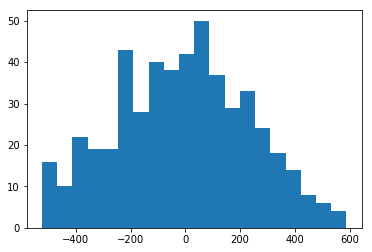

In [44]:
plt.hist(cost, bins=20)

#### single datapoint like data

In [45]:
data = dg.cluster_generator()

list_tmp= []
for i in data:
    decision = np.random.binomial(1,0.5)
    list_tmp.append(cst.cost_investigation(i, decision))
print(sum(list_tmp))
    

-126.0


(array([213.,   0., 291.,   0., 300.,   0.,   0.,   0.,   0., 197.]),
 array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <a list of 10 Patch objects>)

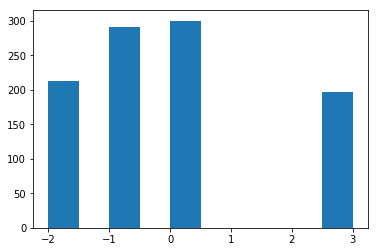

In [46]:
plt.hist(list_tmp)